# Research Goal:
<b>Research and develop a detector for unusual patterns in email traffic to non-organizational accounts.</b>


Anomalies are important, but we should also consider generating, say, an event for anytime a person sends an email to their non-org account during their offboarding period.

Perhaps for email, always bin the data by week. Is week optimal to detect this behavior?

Once anomalies are identified, how do we interpret the different types of anomalies?
    - Mean shift (rapid transition to new mean)
        - Indicator they are rapidly communicating with competitor
        - Indicator they are quickly leaking IP
    - Ramp up (slow transition to new mean)
        - Indicator they are slowly beginning to communicate with competitor
        - Indicator they are quickly leaking IP


Proportion of emails to outside is probaby small compared to inside traffic (how small is this?)

In addition to unusual traffic, we should also look at unusual send time. However, CERT suggests
most IP is leaked during normal work hours.

Can we obtain a list of competitor accounts from organization?

Sending to a new non-org account, even for first time, is interesting.

## Import Python Packages

In [7]:
%matplotlib inline
import pandas as pd

## The Email Dataset

CERT provides a description below of the their provided email data:

CERT provides a description below of the different scenarios that are modeled:

Below are the insiders that correspond to an insider user scenario of "CDE1846", but it also contains 157 other users:

The dataset loaded below is a subset (for computional convenience). It contains the insider 

In [8]:
df = pd.read_csv('../../data/email_filtered.csv', parse_dates=['date'])

In [9]:
df.head()

,id,date,user,pc,to,cc,bcc,from,activity,size,attachments,content
0,{D0V4-N9KM15BF-0512LLVP},2010-01-04 07:36:48,BTR2026,PC-9562,Thaddeus.Brett.Daniel@dtaa.com,Zorita.Angela.Wilson@dtaa.com,NaN,Beau.Todd.Romero@dtaa.com,Send,23179,NaN,"On November 25, general Savary was sent to the..."
1,{L5E5-J1HB80OY-9539AOEC},2010-01-04 07:38:18,BTR2026,PC-9562,Beau.Todd.Romero@dtaa.com,NaN,NaN,Marsh_Travis@raytheon.com,View,17047,NaN,"Early in the morning of May 27, a boat crossed..."
2,{Q4V7-V6BR00TZ-5209UVDX},2010-01-04 07:53:35,BTR2026,PC-9562,Bianca-Clark@optonline.net,NaN,NaN,Beau_Romero@aol.com,Send,26507,NaN,The Americans never held up their side of the ...
3,{Q0S5-G9FU80DK-0356YZID},2010-01-04 07:59:19,BTR2026,PC-9562,Beau.Todd.Romero@dtaa.com,NaN,NaN,Lunea.Evelyn.Massey@dtaa.com,View,20891,NaN,"General Arnold, who was meeting with the retre..."
4,{C3U3-I4CT54EL-4597MPWW},2010-01-04 08:00:58,BTR2026,PC-9562,Beau.Todd.Romero@dtaa.com,NaN,NaN,Holman-Yardley@harris.com,View,29753,NaN,"Man the divine manifestation effectively dies,..."


In [10]:
# The insider
df_insider = df[df['user'] =='CDE1846']
df_insider

,id,date,user,pc,to,cc,bcc,from,activity,size,attachments,content
9,{H4R6-U0EC95ZE-4584YYEM},2010-01-04 13:01:14,CDE1846,PC-1237,Ashley-Finn@comcast.net,Edward-Curtis@bellsouth.net,Ewing_Carlos@comcast.net,Ewing_Carlos@comcast.net,Send,1058059,C:\KL5P0DHC.txt(1036651),"In 1937, The Times described the half-mile bet..."
10,{V3O9-Q2PD59GF-8779BWTB},2010-01-04 13:01:46,CDE1846,PC-1237,Carlos.Dieter.Ewing@dtaa.com,NaN,NaN,Stephen.Ferris.Montoya@dtaa.com,View,32238,NaN,An Ohio School Facilities Assessment in 2002 r...
11,{M3B1-I9DN95IL-9836XHQK},2010-01-04 13:08:27,CDE1846,PC-1237,Edward-Curtis@bellsouth.net,Ewing_Carlos@comcast.net,NaN,Ewing_Carlos@comcast.net,Send,44032,NaN,"To the north, two volcanoes form a sparse area..."
12,{A4F3-N8RI14LU-3305OWVQ},2010-01-04 13:13:22,CDE1846,PC-1237,Carlos.Dieter.Ewing@dtaa.com,NaN,NaN,Tamara_Sexton@harris.com,View,30448,NaN,"In all, the Justice Department task force secu..."
13,{I4D7-I5YY55UW-2126SGPH},2010-01-04 13:13:46,CDE1846,PC-1237,Carlos.Dieter.Ewing@dtaa.com,NaN,NaN,Malcolm.Timothy.Nielsen@dtaa.com,View,48777,NaN,The Democrats on the Senate committee publishe...
14,{T1B1-L8ZE40DC-8153KPWM},2010-01-04 13:13:46,CDE1846,PC-1237,Shaw-Quincy@earthlink.net;JHK841@bellsouth.net...,Zephr_A_Collier@yahoo.com,Ewing_Carlos@comcast.net,Ewing_Carlos@comcast.net,Send,19688,NaN,"The furniture in the hall was designed by, and..."
15,{G9A1-K1VO47KR-2765BQPM},2010-01-04 13:14:06,CDE1846,PC-1237,Carlos.Dieter.Ewing@dtaa.com,NaN,NaN,RCC7422@northropgrumman.com,View,29158,NaN,It's a lot of things strung together that pain...
16,{N8X9-H8JJ82NM-5606NSOZ},2010-01-04 13:17:31,CDE1846,PC-1237,Carlos.Dieter.Ewing@dtaa.com,NaN,NaN,Carl.Alfonso.Roman@dtaa.com,View,39711,NaN,The line of volcanoes has been the subject of ...
17,{K6T9-W5TE97FD-9058TBDC},2010-01-04 13:22:49,CDE1846,PC-1237,Carlos.Dieter.Ewing@dtaa.com,NaN,NaN,EDA1416@boeing.com,View,29208,NaN,"The tower was completed in 1956, and the colle..."
52,{T9O4-O7UF16YT-4710JANO},2010-01-05 14:42:37,CDE1846,PC-1237,Diana.Colette.Clayton@dtaa.com;Ralph.Aladdin.B...,Imogene.Charde.Hicks@dtaa.com;Ursa.Melinda.Ben...,NaN,Cole.Nicolas.Knight@dtaa.com,View,30266,NaN,"As a result, in June 1924 the navy's gunnery s..."


In [5]:
df_insider.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3165 entries, 9 to 11910
Data columns (total 12 columns):
id             3165 non-null object
date           3165 non-null datetime64[ns]
user           3165 non-null object
pc             3165 non-null object
to             3165 non-null object
cc             1997 non-null object
bcc            519 non-null object
from           3165 non-null object
activity       3165 non-null object
size           3165 non-null int64
attachments    1274 non-null object
content        3165 non-null object
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 321.4+ KB


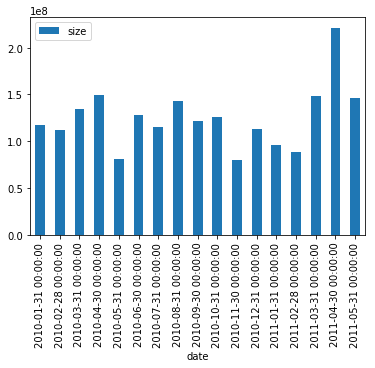

In [11]:
#df_insider['date'].groupby([df_insider['date'].dt.month, df_insider['date'].dt.year]).agg('count').plot(kind='bar')
df_insider.resample(rule='1M', on='date').sum().plot(kind='bar')

In [13]:
df_insider_non_org = df_insider[~df_insider['to'].str.contains('dtaa.com')]
df_insider_non_org

,id,date,user,pc,to,cc,bcc,from,activity,size,attachments,content
9,{H4R6-U0EC95ZE-4584YYEM},2010-01-04 13:01:14,CDE1846,PC-1237,Ashley-Finn@comcast.net,Edward-Curtis@bellsouth.net,Ewing_Carlos@comcast.net,Ewing_Carlos@comcast.net,Send,1058059,C:\KL5P0DHC.txt(1036651),"In 1937, The Times described the half-mile bet..."
11,{M3B1-I9DN95IL-9836XHQK},2010-01-04 13:08:27,CDE1846,PC-1237,Edward-Curtis@bellsouth.net,Ewing_Carlos@comcast.net,NaN,Ewing_Carlos@comcast.net,Send,44032,NaN,"To the north, two volcanoes form a sparse area..."
14,{T1B1-L8ZE40DC-8153KPWM},2010-01-04 13:13:46,CDE1846,PC-1237,Shaw-Quincy@earthlink.net;JHK841@bellsouth.net...,Zephr_A_Collier@yahoo.com,Ewing_Carlos@comcast.net,Ewing_Carlos@comcast.net,Send,19688,NaN,"The furniture in the hall was designed by, and..."
56,{H9Y9-I4CJ02FM-5301ZJZZ},2010-01-05 15:56:16,CDE1846,PC-1237,Huff.John@sbcglobal.net;Hull_Carl@netzero.com,Ewing_Carlos@comcast.net,NaN,Noelani_Miles@comcast.net,View,30839,NaN,Nixon family friend and Whittier College trust...
60,{H8Q9-N9JC95JX-2406TNRP},2010-01-05 16:01:39,CDE1846,PC-1237,Jimenez-Baxter@yahoo.com;CNK8@verizon.net,CEM5@aol.com;Zephr_A_Collier@yahoo.com,Ewing_Carlos@comcast.net,Ewing_Carlos@comcast.net,Send,37076,NaN,This was the second largest plane factory in G...
62,{F4I1-L2NW66KI-9518PHXO},2010-01-05 16:03:00,CDE1846,PC-1237,Edward-Curtis@bellsouth.net,Ewing_Carlos@comcast.net,NaN,Ewing_Carlos@comcast.net,View,44032,NaN,"To the north, two volcanoes form a sparse area..."
76,{Z2K8-K2MY03MM-9801HWNN},2010-01-06 10:19:45,CDE1846,PC-1237,Shaw-Quincy@earthlink.net,NaN,Ewing_Carlos@comcast.net,Ewing_Carlos@comcast.net,Send,49015,NaN,"The remaining ""vestiges"" of the first plan, he..."
104,{X3B5-Z3FK85XK-7048IOBI},2010-01-07 12:15:21,CDE1846,PC-1237,Noelani_Miles@comcast.net;Edward-Curtis@bellso...,Ashley-Finn@comcast.net,NaN,Ashley-Finn@comcast.net,View,25083,NaN,A soldier in a specific Job always has its inn...
115,{X9Y3-N9EL87PD-8386AKSW},2010-01-07 16:03:00,CDE1846,PC-1237,Shaw-Quincy@earthlink.net,NaN,NaN,Ewing_Carlos@comcast.net,View,49015,NaN,"The remaining ""vestiges"" of the first plan, he..."
119,{Z3F1-P2SB95VF-6007XRUY},2010-01-07 16:34:00,CDE1846,PC-1237,Jimenez-Baxter@yahoo.com;CNK8@verizon.net,CEM5@aol.com;Zephr_A_Collier@yahoo.com,NaN,Ewing_Carlos@comcast.net,View,37076,NaN,This was the second largest plane factory in G...


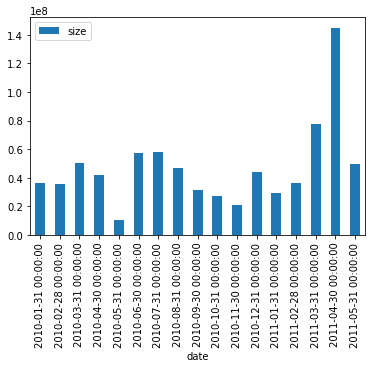

In [14]:
#df_insider_non_org['date'].groupby([df_insider_non_org['date'].dt.month, df_insider_non_org['date'].dt.year]).agg('count').plot(kind='bar')
df_insider_non_org.resample('1M', on='date').sum().plot(kind='bar')

# Explore Insider Threat Case

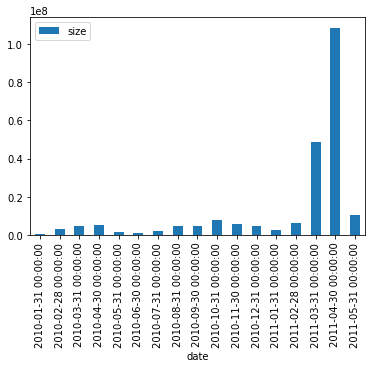

In [17]:
# Here, we look at the case where the insider email IP to their home account
# The data is resampled per month and the anomalous behavior is clearly
# visible
df_insider_ewing = df_insider_non_org[df_insider_non_org['to'] == 'Ewing_Carlos@comcast.net']
df_insider_ewing.resample('1M', on='date').sum().plot(kind='bar')

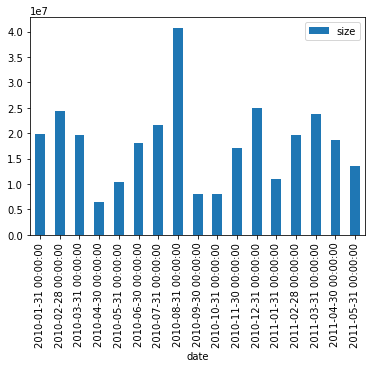

In [18]:
df_noninsider = df[df['user'] =='BTR2026']
df_noninsider = df_noninsider[~df_noninsider['to'].str.contains('dtaa.com')]
df_noninsider.resample('1M', on='date').sum().plot(kind='bar')